In [1]:
from math import sqrt, pow 
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
#DBScan Algorithm


class DBSCAN:  

    visit_cnt = 0
    def __init__(self):  
        self.DB = [] #Database to represent RGB values
        self.epsilon = 0.3 #neighborhood distance for search  
        self.MinPts = 10  #minimum number of points required to form a cluster  
        self.cluster_inx = -1  
        self.cluster = []
        self.clusterCentroids = [] 
        self.noise = [] 
       
    def DBSCAN(self):  
        for i in range(len(self.DB)):  
            p_tmp = self.DB[i]  
            if (not p_tmp.visited):  
                p_tmp.visited = True 
                self.visit_cnt += 1 
                NeighborPts = self.epsilon_neighbourhood(p_tmp)  
                if(len(NeighborPts) < self.MinPts):  
                    p_tmp.isnoise = True  
                    self.noise.append(p_tmp)
                    
                else:  
                    self.cluster.append([])  
                    self.cluster_inx = self.cluster_inx + 1  
                    self.check_neighbourhood(p_tmp, NeighborPts) 
    
    def check_neighbourhood(self, P, neighbor_points):  
        self.cluster[self.cluster_inx].append(P)  
        iterator = iter(neighbor_points)  
        while True:  
            try:   
                npoint_tmp = next(iterator)  
            except StopIteration:  
                break 
            if (not npoint_tmp.visited):  
                npoint_tmp.visited = True 
                self.visit_cnt += 1 
         
                NeighborPts1 = self.epsilon_neighbourhood(npoint_tmp)
                if (len(NeighborPts1) >= self.MinPts):  
                    for j in range(len(NeighborPts1)):  
                        neighbor_points.append(NeighborPts1[j])  
            if (not self.check_membership(npoint_tmp)):  
                self.cluster[self.cluster_inx].append(npoint_tmp)  
   
    def check_membership(self, P):  
        for i in range(len(self.cluster)):  
            for j in range(len(self.cluster[i])):  
                if (P.r == self.cluster[i][j].r and P.g == self.cluster[i][j].g and P.b == self.cluster[i][j].b):  
                    return True  
        return False  
       
    def epsilon_neighbourhood(self, P):  
        pointInRegion = []  
        for i in range(len(self.DB)):  
            p_tmp = self.DB[i]
            if (self.dist(P, p_tmp) <= self.epsilon and P.r != p_tmp.r and P.g != p_tmp.g and P.b != p_tmp.b):  
                pointInRegion.append(p_tmp)  
        return pointInRegion #,points  
   
    def dist(self, p1, p2):  
        dr = (p1.r - p2.r)  
        dg = (p1.g - p2.g) 
        db = (p1.b - p2.b)
        a = sqrt(pow(dr,2) + pow(dg,2) + pow(db,2))
        return a/(255*sqrt(3))  
   
    def mode(self,x):
        tmp = []
        for i in x:
            tmp.append((i.r,i.g,i.b))
        return max(tmp,key = lambda x: tmp.count(x))

class DataSet:  

    def __init__(self, rgb, x, y, visited = False, isnoise = False):  
        self.r = rgb[0]
        self.g = rgb[1]
        self.b = rgb[2] 
        self.x = x  
        self.y = y 
        self.visited = False  
        self.isnoise = False  
   
    def show(self):  
        return self.r, self.g, self.b 

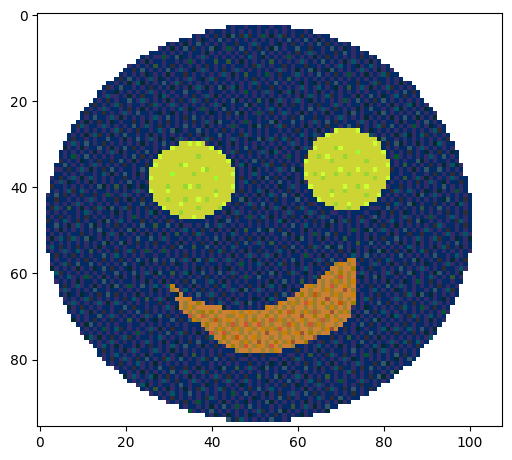

In [3]:
if __name__=='__main__': 

   # read an image 
    i = Image.open("smiley.gif")
    i = i.convert("RGB")  
    width, height = i.size
    
    plt.figure(figsize=(6, 6))
    plt.imshow(i)

    cpixels = []
    all_pixels = [] # list of tuples
    for x in range(width):
        for y in range(height):
            cpixel = i.getpixel((x,y))
            cpixels.append(cpixel)
            all_pixels.append(DataSet(cpixel,x,y)) 

In [4]:
#Create object of DBSCAN class
dbScan = DBSCAN()  
   #Initialise dataSet  
dbScan.DB = all_pixels;  
   #build clusters 
dbScan.DBSCAN()  

In [5]:
for i in range(len(dbScan.cluster)):  
    print('Cluster: ', i ) 
    for j in range(len(dbScan.cluster[i])):  
        print(dbScan.cluster[i][j].show())

   # Writing new image

    newImg = Image.new('RGB', (width,height))
    pixels1 = newImg.load()
    cnt = 0
    cluster_tmp = []
    for i in range (width):
        for j in range (height):
            for k in range(len(dbScan.cluster)):
                cluster_tmp.append([])
                for l in dbScan.cluster[k]:
                    if(cpixels[cnt]==(l.r,l.g,l.b)):
                        cluster_tmp[k].append(DataSet(cpixels[cnt],i,j))
            cnt += 1

    for i in range(len(dbScan.cluster)):
            dbScan.clusterCentroids.append(dbScan.mode(cluster_tmp[i]))

    cnt = 0
    for i in range (width):
        for j in range (height):
            for k in range(len(dbScan.cluster)):
                for l in dbScan.cluster[k]:
                    if(cpixels[cnt]==(l.r,l.g,l.b)):
                        pixels1[i,j] = dbScan.clusterCentroids[k];
            cnt += 1

    

Cluster:  0
(51, 43, 102)
(0, 85, 51)
(153, 85, 51)
(204, 128, 0)
(153, 213, 51)
Cluster:  1
(0, 43, 102)
(51, 85, 51)
(153, 128, 0)
(204, 213, 51)
(204, 85, 51)
Cluster:  2
(51, 43, 51)
(0, 85, 102)
Cluster:  3
(0, 43, 51)
(51, 85, 102)
(153, 128, 51)
(204, 85, 0)


In [6]:
print (len(dbScan.cluster))

4


In [7]:
newImg.save("newsmiley.jpeg")
print("Number of clusters:",len(dbScan.clusterCentroids))
print("Noise:",len(dbScan.noise))
for i in cluster_tmp:
    if(cluster_tmp.index(i) == len(dbScan.clusterCentroids)):
        break
        xy = set([(j.x,j.y) for j in i])
        print("Cluster",cluster_tmp.index(i)+1,"\nLength of cluster:",len(i),"\nx-y coordinates:",xy)

Number of clusters: 16
Noise: 3460
